## Searching for DNA string matches

Jacob L. Fine

June 3rd, 2024

We are often interested in searching through a list of strings to return if a query string matches any of the strings present in the list. 

Here we will implement two approaches: the binary search algorithm and the brute-force approach. The binary search algorithm works by partitioning a sorted list into parts based on whether the string being searched is alphabetically greater/less than the lower/upper index bound, so that only portions of the list are searched, rather than the entire list. The brute-force approach does just this, i.e., searching every item in the list until a match is found.

Here, we will implement both methods and show that the binary search requires less time to compute then the brute-force approach. We will demonstrate this in the context of finding the index of a specific DNA sequence in a list of many DNA sequences, with lists of up to 1000000 sequences.

In [157]:
import random

random.seed(101010)
def generate_random_dna_sequence(length: int) -> str:
    # generates DNA sequence from the alphabet 'ATCG'
    return ''.join(random.choice('ATCG') for _ in range(length))

def generate_dna_list(num_sequences: int, sequence_length: int) -> list:
    # generates a list of DNA sequences using the generator for a given sequence
    return [generate_random_dna_sequence(sequence_length) for _ in range(num_sequences)]

def binary_search(dna_sequences: list, query: str) -> int:
    '''
    A binary search on a sorted list of DNA sequences.

    Args:
    dna_sequences (list of str): A sorted list of DNA sequences
    query (str): The DNA sequence to find

    Returns:
    int: The index of the query sequence in the list, or -1 if not found.
    '''
    # the initial lower and upper bounds of the list to search
    low = 0
    high = len(dna_sequences) - 1

    while low <= high: 
        # sets teh middle index based on the upper and lower indices
        mid = (low + high) // 2
        # gets the item associated with the middle index
        mid_val = dna_sequences[mid]

        # finally, once the item with middle index is equal to the query, return the middle index
        if mid_val == query:
            return mid
        # otherwise, (since the list is sorted alphabetically), if the query occurs after the middle value, we now just need to consider
        # strings after the middle value, so we update the lower bound to the middle index.
        elif query > mid_val:
            low = mid + 1
        # otherwise, do the opposite
        else:
            high = mid - 1

    return -1  # we return -1 if nothing was found


def brute_force_search(dna_sequences, query):
    '''
    A brute force seach on a sorted list of DNA sequences.

    Args:
    dna_sequences (list of str): A sorted list of DNA sequences
    query (str): The DNA sequence to find

    Returns:
    int: The index of the query sequence in the list, or -1 if not found.
    '''
    # simply scans every element in the list until a match is found
    for index, sequence in enumerate(dna_sequences):
        if sequence == query:
            return index
    return -1  # we return -1 if nothing was found

In [158]:
import timeit
import math

random.seed(101010)

# max value of input size
max_value = 1000000

# generates different input sizes
input_sizes = [10**i for i in range(int(math.log10(1)), int(math.log10(max_value)) + 1)]

# to store the list of running times for binary search
time_list_binary = []
time_list_brute = []
# iterates through each running time and implements binary search
for size in input_sizes:
    num_sequences = size  # number of DNA sequences to generate
    sequence_length = 10  # length of each DNA sequence

    # generates the list of DNA sequences
    dna_sequences = generate_dna_list(num_sequences, sequence_length)

    # sorts the list, necessary for binary search
    sorted_dna_sequences = sorted(dna_sequences)

    # generates a search to search for
    query = random.choice(dna_sequences)
    # performs the search, and times it (for binary search)
    time_taken_binary = timeit.timeit(lambda: binary_search(sorted_dna_sequences, query), number=1)
    # appends to the list of times (for binary search)
    time_list_binary.append(time_taken_binary)

    # performs the search, and times it (for brute force approach)
    time_taken_brute = timeit.timeit(lambda: brute_force_search(sorted_dna_sequences, query), number=1)
    # appends to the list of times (for brute force approach)
    time_list_brute.append(time_taken_brute)


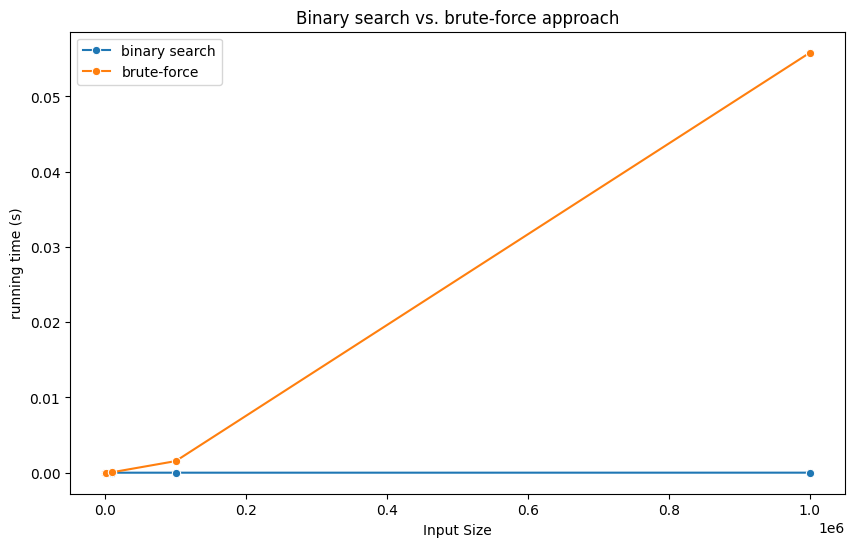

In [161]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# makes a dataframe out of the running time lists for different inputs.
data = {
    'input size': input_sizes,
    'binary search': time_list_binary,
    'brute force': time_list_brute
}

df = pd.DataFrame(data)

# plots the data

plt.figure(figsize=(10, 6))
sns.lineplot(x='input size', y='binary search', data=df, marker='o', label='binary search')
sns.lineplot(x='input size', y='brute force', data=df, marker='o', label='brute-force')
plt.xlabel('Input Size')
plt.ylabel('running time (s)')
plt.title('Binary search vs. brute-force approach')
plt.legend()
plt.show()


We can observe that the binary search algorithm has consistently lower running time for different input sizes, than the brute force approach. 

The actual time complexity of the binary search can be shown to be O(log n), where n is the number of items in the list being searched, while the brute force approach has a time complexity of O(n).